In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from optics import OPTICS

In [2]:
COLORS = ['plum', 'palevioletred', 'sandybrown', 'lightcoral', 'crimson',
          'mediumaquamarine', 'steelblue', 'slateblue', "cadetblue", 'darkcyan'
          'cornflowerblue', 'seagreen', 'lightsalmon', 'burlywood', 'forestgreen']

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
       sepal_length   sepal_width  petal_length   petal_width
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -1.457168e-15 -1.722511e-15 -2.043551e-15 -9.843977e-17
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min   -1.863780e+00 -2.430844e+00 -1.563497e+00 -1.439627e+00
25%   -8.976739e-01 -5.858010e-01 -1.223442e+00 -1.177559e+00
50%   -5.233076e-02 -1.245404e-01  3.351431e-01  1.327811e-01
75%    6.722490e-01  5.673

Text(0, 0.5, 'petal width')

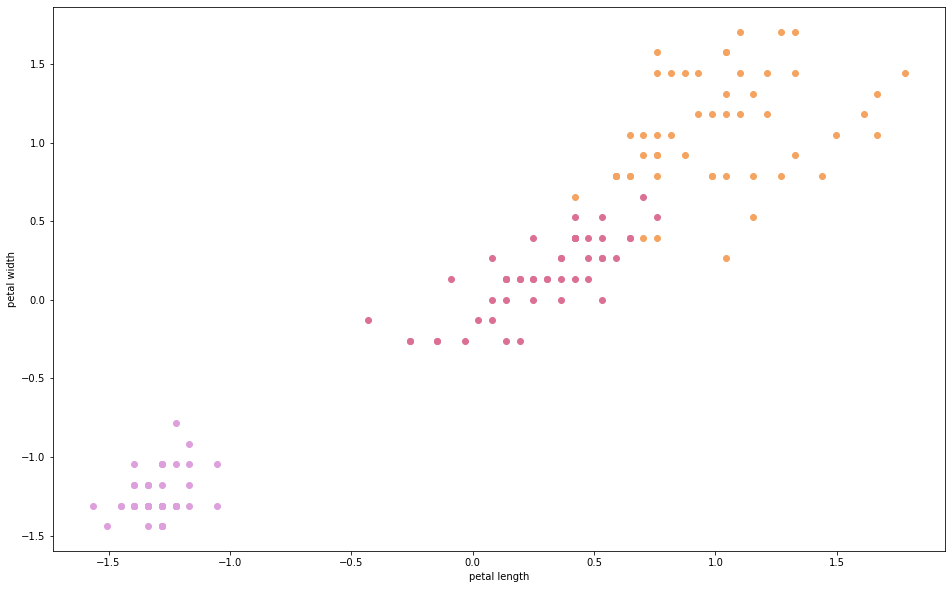

In [77]:
df = pd.read_csv("cluster_data_set/iris1.csv")
print(df.describe())
df.iloc[:,:-1] = (df.iloc[:,:-1] - df.iloc[:,:-1].mean()) / (df.iloc[:,:-1].std())
print(df.describe())
labels0 = list(set(df.iloc[:,-1]))
print(labels0)
fig0 = plt.figure("ground truth",(16,10))
for i in range(len(df)):
    plt.scatter(df.iloc[i, 2], df.iloc[i, 3],color=COLORS[labels0.index(df.iloc[i,-1])])
plt.xlabel("petal length")
plt.ylabel("petal width")

(0.0, 1.8)

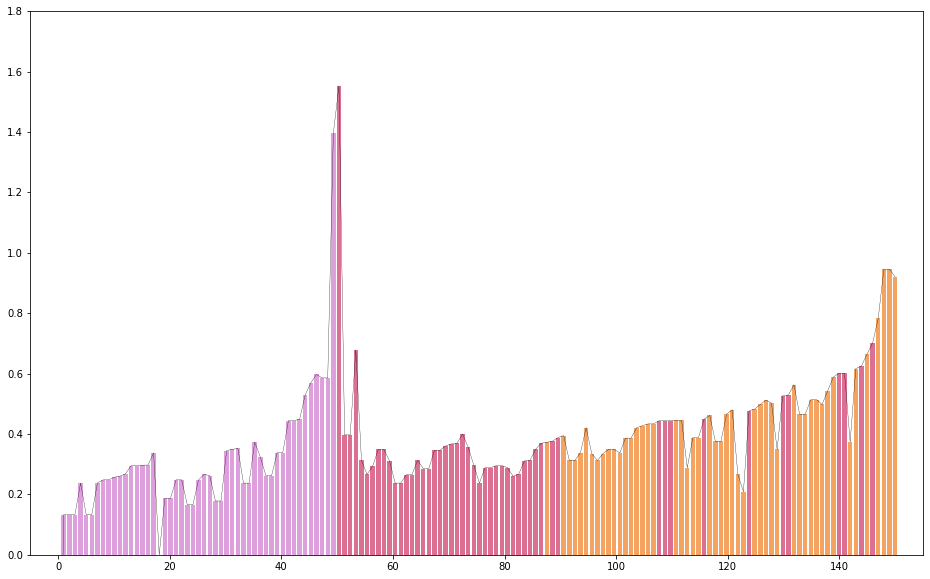

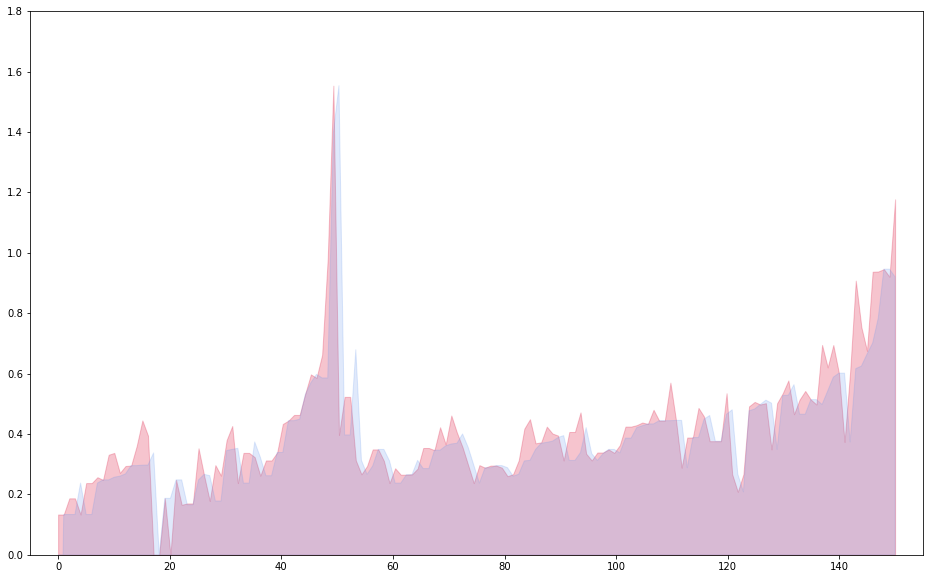

In [78]:
# remove label for clustering task.
df1 = df.iloc[:, :-1]
# run optics cluster.
model = OPTICS(df1)
model.optics(Eps=float('inf'), MinPts=2)
# show ordered reachable distance and core distance.
fig1 = plt.figure("ordered rd with ground truth label",(16,10))
index = np.linspace(0, model.len, model.len)
rd = []
cd = []
labels = []
for i in range(model.len):
    rd.append(model.reachable_distances[model.result_queue[i]])
    cd.append(model.core_distances[model.result_queue[i]])
    labels.append(COLORS[labels0.index(df.iloc[model.result_queue[i], -1]) % len(COLORS)])
plt.bar(index, rd, color=labels)
plt.plot(index, rd, color='black', linewidth=0.3)
plt.ylim(0, 1.8)
plt.xlim(-5, model.len+5)
fig2 = plt.figure("ordered rd and cd",(16,10))
plt.fill_between(index, 0, cd, alpha=0.25, color='crimson')
plt.fill_between(index, 0, rd, alpha=0.2, color='cornflowerblue')
plt.xlim(-5, model.len+5)
plt.ylim(0, 1.8)

(0.0, 5.0)

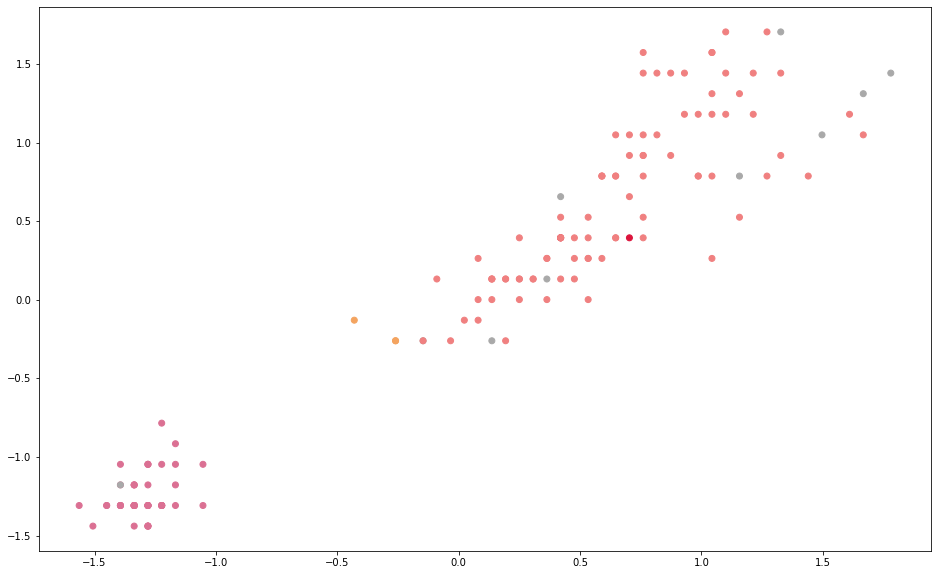

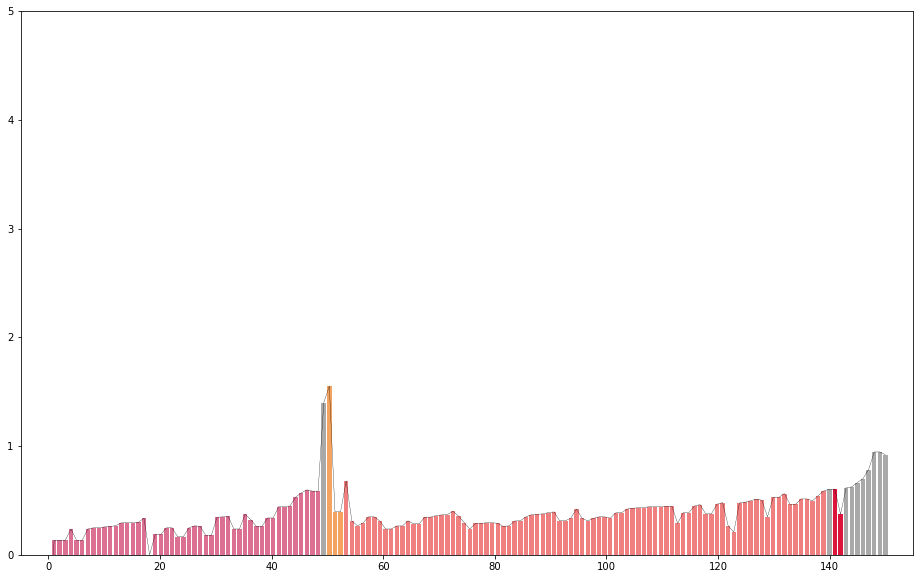

In [80]:
# extract cluster result and visualize
model.cluster_extract(0.6)
fig3 = plt.figure("clustering result",(16,10))
cluster_labels = []
for i in range(model.len):
    c = model.cluster_labels[i]
    if c == -1:
        cluster_labels.append("darkgrey")
    else:
        cluster_labels.append(COLORS[c % len(COLORS)])
plt.scatter(df.iloc[:, 2], df.iloc[:, 3], color=cluster_labels)

fig4 = plt.figure("rd with clustering labels",(16,10))
plt.bar(index, rd, color=[cluster_labels[i] for i in model.result_queue])
plt.plot(index, rd, color='black', linewidth=0.3)
plt.xlim(-5, model.len + 5)
plt.ylim(0, 5)